# Regression in Python

This is a very quick run-through of some basic statistical concepts, adapted from Lab 4 in Harvard's CS109 course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

Linear Regression Models
Prediction using linear regression
Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: statsmodels, seaborn, and scikit-learn. While we don't explicitly teach statsmodels and seaborn in the Springboard workshop, those are great libraries to know.


In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


## Part 1: Introduction to Linear Regression

### Purpose of linear regression

Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to:

Build a predictive model to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.
Model the strength of the relationship between each independent variable $X_i$ and $Y$
Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$
Need to figure out which $X_i$ contributes most information to predict $Y$
It is in many cases, the first pass prediction algorithm for continuous outcomes.
A Brief Mathematical Recap

Linear Regression is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$. This method assumes the relationship between each predictor $X$ is linearly related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model.

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

$\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

$\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

Back to the simple model. The model in linear regression is the conditional mean of $Y$ given the values in $X$ is expressed a linear function.

$$ y = f(x) = E(Y | X = x)$$

conditional mean Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.

The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.
$$ \hat{\beta}_0, \hat{\beta}_1 $$

Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.
$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
$X_1$, $X_2$, $X_3$, $\ldots$
How do you estimate the coefficients?
There are many ways to fit a linear regression model
The method called least squares is the most common methods
We will discuss least squares
$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$

Estimating $\hat\beta$: Least squares

Least squares is a method that can estimate the coefficients of a linear model by minimizing the squared residuals:

$$ \mathscr{L} = \sum_{i=1}^N \epsiloni^2 = \sum{i=1}^N \left( y_i - \hat{y}i \right)^2 = \sum{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.

Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$

$ \begin{align} \frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta0}} \sum{i=1}^N \epsilon^2 \ &= \frac{\partial}{\partial \hat{\beta0}} \sum{i=1}^N \left( y_i - \hat{y}_i \right)^2 \ &= \frac{\partial}{\partial \hat{\beta0}} \sum{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 xi \right) \right)^2 \ &= -2 \sum{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 xi \right) \right) \hspace{25mm} \mbox{(by chain rule)} \ &= -2 \sum{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 xi) \ &= -2 \left[ \left( \sum{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}1 \left( \sum{i=1}^N x_i \right) \right] \ & 2 \left[ N \hat{\beta}_0 + \hat{\beta}1 \sum{i=1}^N xi - \sum{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \ & N \hat{\beta}_0 + \hat{\beta}1 \sum{i=1}^N xi - \sum{i=1}^N y_i = 0 \ & N \hat{\beta}0 = \sum{i=1}^N y_i - \hat{\beta}1 \sum{i=1}^N x_i \ & \hat{\beta}0 = \frac{\sum{i=1}^N y_i - \hat{\beta}1 \sum{i=1}^N x_i}{N} \ & \hat{\beta}0 = \frac{\sum{i=1}^N y_i}{N} - \hat{\beta}1 \frac{\sum{i=1}^N x_i}{N} \ & \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}} \end{align} $

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$ \begin{align} \frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta1}} \sum{i=1}^N \epsilon^2 \ &= \frac{\partial}{\partial \hat{\beta1}} \sum{i=1}^N \left( y_i - \hat{y}_i \right)^2 \ &= \frac{\partial}{\partial \hat{\beta1}} \sum{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 xi \right) \right)^2 \ &= 2 \sum{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -xi \right) \hspace{25mm}\mbox{(by chain rule)} \ &= -2 \sum{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 xi \right) \ &= -2 \sum{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 xi^2) \ &= -2 \sum{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 xi^2) \ &= -2 \sum{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 xi^2) \ &= -2 \left[ \sum{i=1}^N x_i yi - \bar{y} \sum{i=1}^N x_i + \hat{\beta}1\bar{x}\sum{i=1}^N x_i - \hat{\beta}1 \sum{i=1}^N x_i^2 \right] \ &= -2 \left[ \hat{\beta}1 \left{ \bar{x} \sum{i=1}^N xi - \sum{i=1}^N xi^2 \right} + \left{ \sum{i=1}^N x_i yi - \bar{y} \sum{i=1}^N x_i \right}\right] \ & 2 \left[ \hat{\beta}1 \left{ \sum{i=1}^N xi^2 - \bar{x} \sum{i=1}^N xi \right} + \left{ \bar{y} \sum{i=1}^N xi - \sum{i=1}^N x_i y_i \right} \right] = 0 \ & \hat{\beta}1 = \frac{-\left( \bar{y} \sum{i=1}^N xi - \sum{i=1}^N x_i yi \right)}{\sum{i=1}^N xi^2 - \bar{x}\sum{i=1}^N xi} \ &= \frac{\sum{i=1}^N x_i yi - \bar{y} \sum{i=1}^N xi}{\sum{i=1}^N xi^2 - \bar{x} \sum{i=1}^N x_i} \ & \boxed{\hat{\beta}1 = \frac{\sum{i=1}^N x_i yi - \bar{x}\bar{y}n}{\sum{i=1}^N x_i^2 - n \bar{x}^2}} \end{align} $

The solution can be written in compact matrix notation as

$$\hat\beta = (X^T X)^{-1}X^T Y$$

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models. We'll see an implementation of this in the extra linear regression example.

## Part 2: Exploratory Data Analysis for Linear Relationships

The Boston Housing data set contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository.

Load the Boston Housing data set from sklearn

This data set is available in the sklearn python module which is how we will access it today.

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
print(boston.target.shape)
bos['PRICE'] = boston.target
bos.head()

(506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics

In [10]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Scatterplots

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).

Text(0.5, 1.0, 'Relationship between CRIM and Price')

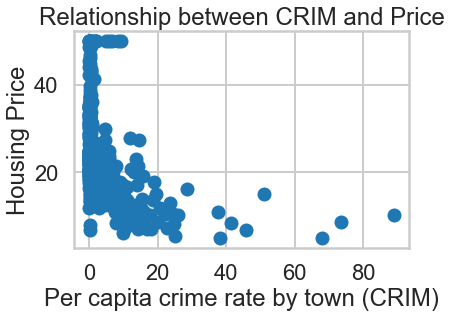

In [14]:
# scatter plot between *CRIM* and *PRICE*
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

## Part 2 Checkup Exercise Set I

Exercise: What kind of relationship do you see? e.g. positive, negative? linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?

Exercise: Create scatter plots between RM and PRICE, and PTRATIO and PRICE. Label your axes appropriately using human readable labels. Tell a story about what you see.

Exercise: What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and PRICE (house price) and tell a story about what you see.

#### Describe relationship
There is a negative non-linear relationship(It looks like a power low distribution. High-crime towns have low price houses. However, there are also low crime towns with low-price houses. More feature should examine to interpret the real relationship.


Text(0.5, 1.0, 'Relationship between RM and Price')

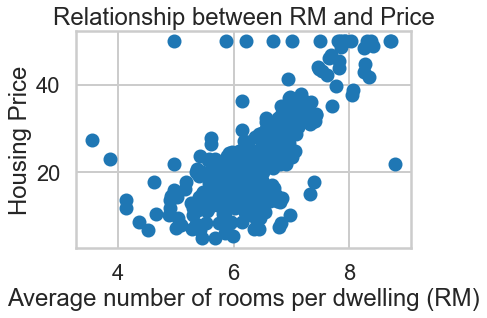

In [15]:
# scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

There is a positive linear relationship. Houses with more room have higher prices. However, there are still several outliers.

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

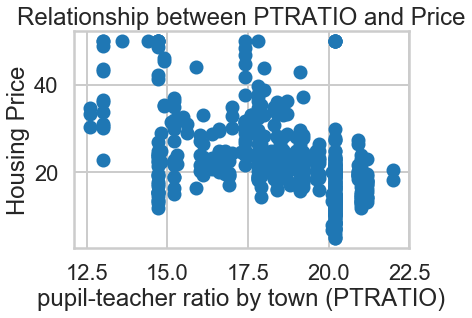

In [17]:
# scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

I think there is not a relationship between PTRATIO and Price. If we do not consider the outliers may be we can say there is a slightly negative relationship.

### Create some other scatter plots

Text(0.5, 1.0, 'Relationship between LSTAD and Price')

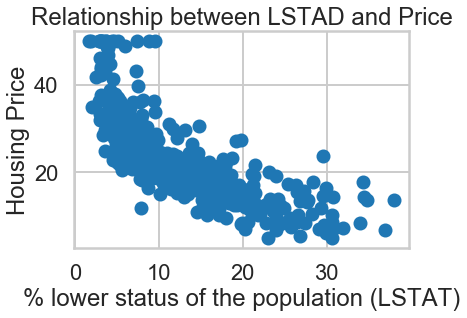

In [27]:
# create some other scatter plots
# scatter plot between *LSTAT* and *PRICE*
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAD and Price")

There is a negative non-linear relationship between LSTAD and Price. When house price gets higher the lower status(or lower income) population is getting lesser. Actually it is an expected result.

Text(0.5, 1.0, 'Relationship between DIS and Price')

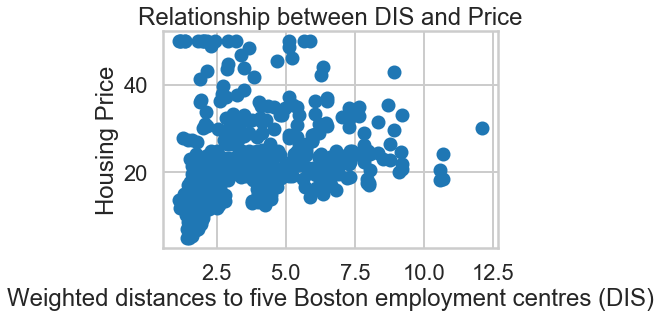

In [36]:
# scatter plot between *DIS* and *PRICE*
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted distances to five Boston employment centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

There is a negative non-linear relationship between RAD and PRICE. There are outliers. House price is lower when distance is higher. People want to live closer to their work. It could affect the result.

## Scatterplots using Seaborn

Seaborn is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use seaborn regplot for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


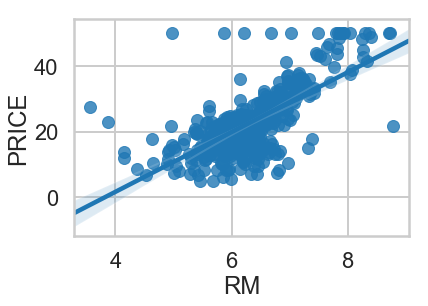

In [22]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

## Histograms



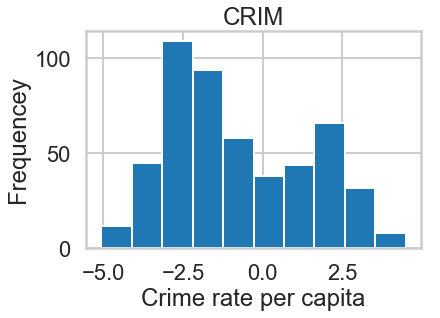

In [23]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

## Part 2 Checkup Exercise Set II

Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

Exercise: Plot the histogram for RM and PTRATIO against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.

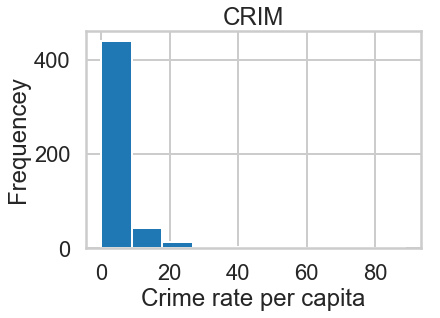

In [25]:
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

The purpose of taking the log is changing the scale. This transformation allow us to see more detail. Without making the transformation the plot was a right skewed histogram but after transformation it is normal distribution.



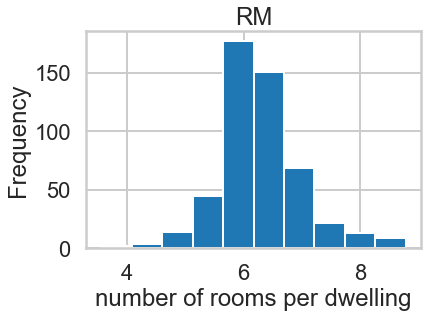

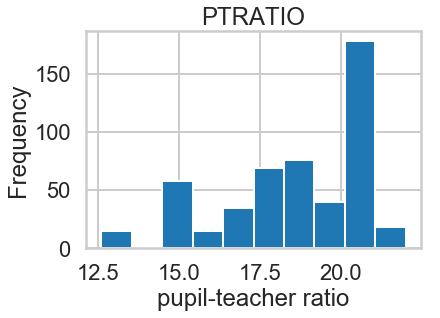

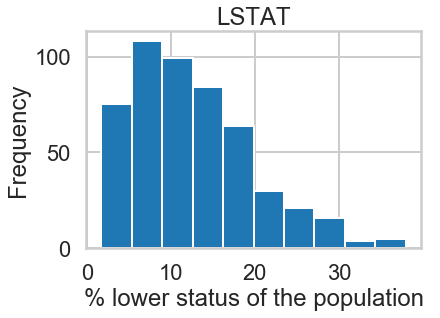

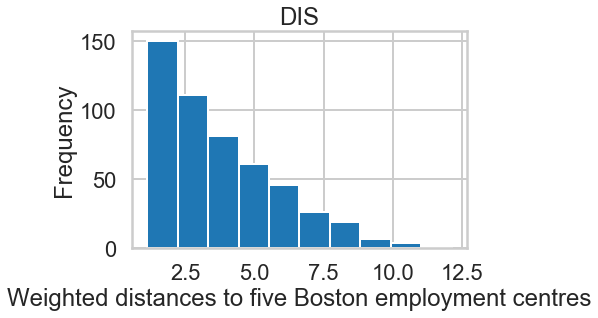

In [43]:
def plot_hist(data,title,xlabel):
    plt.hist(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()
plot_hist(bos.RM,'RM','number of rooms per dwelling')
plot_hist(bos.PTRATIO,'PTRATIO','pupil-teacher ratio')
plot_hist(bos.LSTAT,'LSTAT','% lower status of the population')
plot_hist(bos.DIS,'DIS','Weighted distances to five Boston employment centres')

RM plots is normally distributed. LSTAT and DIS are right skewed histograms. PTRATIO looks like kind of normally distributed.

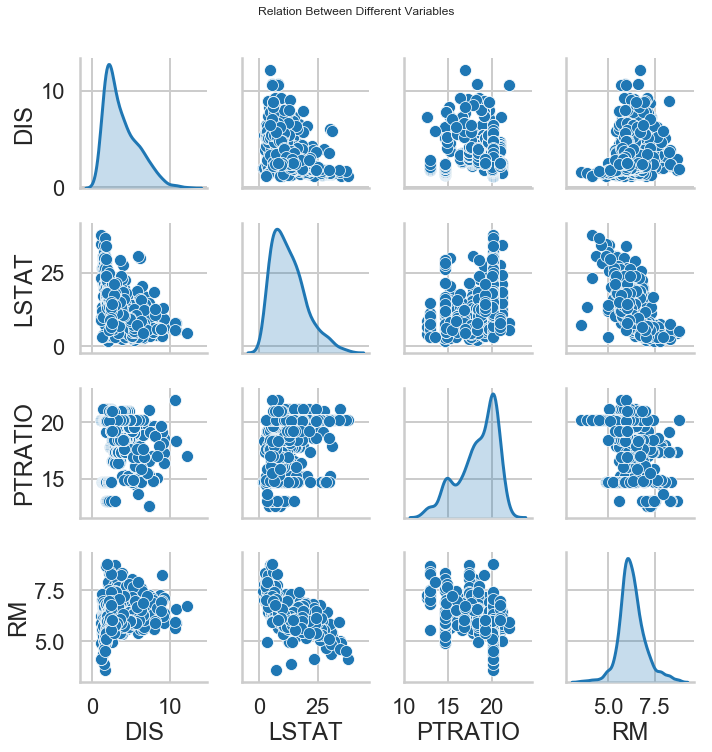

In [45]:
boston=bos[['DIS','LSTAT','PTRATIO','RM']]
g = sns.pairplot(boston,palette="ch:r=-.5,l=.75",diag_kind="kde")
g.fig.suptitle('Relation Between Different Variables',y=1.04,fontsize=12)
plt.show()    

## Part 3: Linear Regression with Boston Housing Data Example

Here,

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

## Fitting Linear Regression using statsmodels

Statsmodels is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called ordinary least-squares (OLS). There are many other versions of least-squares such as partial least squares (PLS) and weighted least squares (WLS).

In [46]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [47]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           2.49e-74
Time:                        08:46:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

## Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the RM coefficient (9.1021) by first noticing that the p-value (under P>|t|) is so small, basically zero. This means that the number of rooms, RM, is a statisticall significant predictor of PRICE. The regression coefficient for RM of 9.1021 means that on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change.

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

## Statsmodels formulas

This formula notation will seem familiar to R users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For statsmodels (ols or logit) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (Outcome, X1,X2, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

 Outcome ~ X1

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

 Outcome ~ X1 + X2 + X3

In general, a formula for an OLS multiple linear regression is

Y ~ X1 + X2 + ... + Xp

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the C() function, call numpy functions to transform data such as np.log for extremely-skewed data, or fit a model without an intercept by including - 1 in the formula. For a quick run-down of further uses see the statsmodels help page.

Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines.

## Part 3 Checkup Exercise Set I

Exercise: Create a scatterplot between the predicted prices, available in m.fittedvalues (where m is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.

Text(0.5, 1.0, 'Relationship between m.fittedvalues and Price')

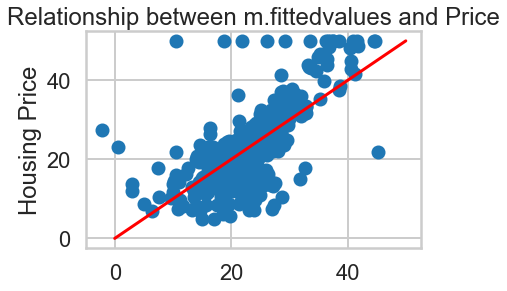

In [50]:
# scatter plot between *m.fittedvalues* and *PRICE*
plt.scatter(m.fittedvalues, bos.PRICE)
plt.plot([0, 50], [0, 50], 'r-')
plt.ylabel("Housing Price")
plt.title("Relationship between m.fittedvalues and Price")

There is a positive linear relationship. The plot looks like same plot with RM&PRICE plot. There are several outliers.

## Fitting Linear Regression using sklearn

In [51]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## What can you do with a LinearRegression object?

Check out the scikit-learn docs here. We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with fit, making predictions with predict and the appropriate scoring function score for each model.

   
#### Main functions	
###### lm.fit()	  
Fit a linear model
###### lm.predit()	
Predict Y using the linear model with estimated coefficients
###### lm.score()	
Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model

### What output can you get?

In [56]:
# Look inside lm object
# lm.<tab>


##### Output	

###### lm.coef_	
Estimated coefficients

###### lm.intercept_	
Estimated intercept

## Fit a linear model

The lm.fit() function estimates the coefficients the linear regression using least squares.

In [57]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Part 3 Checkup Exercise Set II

Exercise: How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look here.

Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.

Exercise: True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.

In [60]:
print('Estimated coefficient:',lm.coef_)
print('Estimated intercept:',lm.intercept_)

Estimated coefficient: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Estimated intercept: 36.45948838509015


In [62]:
# not fit an intercept
lm2=LinearRegression()
lm2.set_params(fit_intercept = False)
lm2.fit(X, bos.PRICE)
print('Estimated coefficient:',lm2.coef_)
print('Estimated intercept:',lm2.intercept_)

Estimated coefficient: [-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]
Estimated intercept: 0.0


I do not recommend not having an intercept. Because, it is not legitimate to have a house with 0 price.

One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy i.i.d. rule, a normally distributed residuals distribution is not enough. There are some datasets are normally distributed, and depended too.
 
False. To use linear regression, Y need not to be normally distributed. Only residuals need to be normally distributed.
 
## Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using 1m.intercept_ and lm.coef_.

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta1$, ..., $\beta{13}$:

$$ \hat{\beta}_0, \hat{\beta}1, \ldots, \hat{\beta}{13} $$

In [63]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))


Estimated intercept coefficient: 36.45948838509015


In [64]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [65]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


## Predict Prices

We can calculate the predicted prices ($\hat{Y}_i$) using lm.predict.

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X1 + \ldots \hat{\beta}{13} X_{13} $$

In [66]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

## Part 3 Checkup Exercise Set III

Exercise: Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?

Exercise: Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with statsmodels before).

Exercise: We have looked at fitting a linear model in both statsmodels and scikit-learn. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does statsmodels provide?

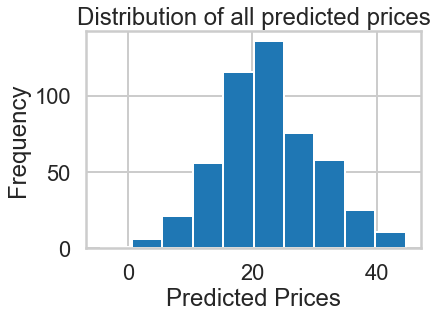

shape: (506,)
mean: 22.532806324110677
standard deviation: 7.907257740483541


In [68]:
plot_hist(lm.predict(X),'Distribution of all predicted prices','Predicted Prices')
print('shape:',lm.predict(X).shape)
print('mean:',np.mean(lm.predict(X)))
print('standard deviation:',np.std(lm.predict(X)))

Distribution of all predicted prices is normally distributed.There are 506 row and the mean is approximately 22 with a aproximately 8 standard deviation. After 42.36 and before 2.8 are outliers. We can drop the outliers or we can try a transformation. In this case I would rather drop them.

Text(0.5, 1.0, 'Relationship between Predicted Privce and True Price')

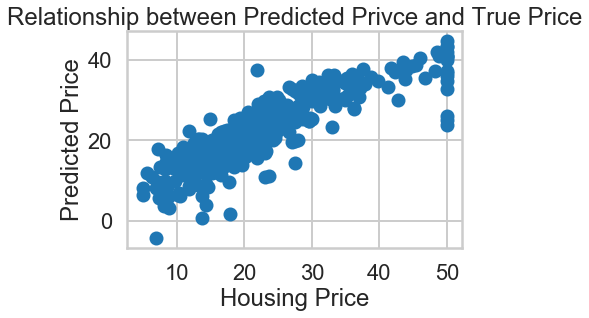

In [70]:
# scatter plot between predictive prices and *PRICE*
plt.scatter(bos.PRICE,lm.predict(X))
plt.xlabel("Housing Price")
plt.ylabel('Predicted Price')
plt.title("Relationship between Predicted Privce and True Price")

Statsmodels gives more detailed statistical output and works nicely with pandas dataframes. However, scikit-learn is more practical and more functional for machine learning. I think both of them are very useful.

## Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N ri^2 = \sum{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [71]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}i - \bar{y} \right)^2 = \sum{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [73]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


## Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that $R^2$ increases artificially as a side-effect of increasing the number of independent variables. While $R^2$ is reported in almost all statistical packages, another metric called the adjusted $R^2$ is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

Evaluating the Model: Mean Squared Error and the $F$-Statistic

The mean squared errors are just the averages of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

Remember: Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that at least one $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \ H_A: \beta_i > 0, \mbox{for some $i$}$$

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$

Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

##### Warning! 
The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

## Part 3 Checkup Exercise Set IV

Let's look at the relationship between PTRATIO and housing price.

Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.

Exercise: Calculate (or extract) the $R^2$ value. What does it tell you?

Exercise: Compute the $F$-statistic. What does it tell you?

Exercise: Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in simple linear regression models.

In [75]:
mdl_1 = ols('PRICE ~ PTRATIO', bos).fit()
print(mdl_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 30 Aug 2019   Prob (F-statistic):           1.61e-34
Time:                        13:43:15   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

### Based on OLS Regression Results:

Coefficient for intercept is 62.3446.

Coefficient for PTRATION is -2.1572

R-squared is 0.258

Coefficient for PTRATIO is negative which means there's a negative linear correlation between PTRATIO & PRICE. For 1 increase in PTRATIO, price is expected to drop approximately 2.16. Coefficient for intercept means that if PTRATIO is 0,Price is about 62.

R-squared shows how well the model fit the data. R-squared is almost 0.26, which means this model only explain 26% of the data.

F-statistic: 175.1

F-statistic is big and p value is smaller than 0.05. Therefore, we can reject null hypothesis. There is a significance relationship between PTRATIO & PRICE.

t=20.581

t is big (> +2.0 or < -2.0) and p value is small,therefore we can reject null hypothesis. The results same with F- statistic..

## Part 3 Checkup Exercise Set V

Fit a linear regression model using three independent variables

'CRIM' (per capita crime rate by town)
'RM' (average number of rooms per dwelling)
'PTRATIO' (pupil-teacher ratio by town)

Exercise: Compute or extract the $F$-statistic. What does it tell you about the model?

Exercise: Compute or extract the $R^2$ statistic. What does it tell you about the model?

Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.

In [76]:
mdl_2 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(mdl_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 01 Sep 2019   Prob (F-statistic):           6.15e-98
Time:                        00:18:15   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

F-statistic  245.2

F-statistic big and p<0.05,therefore we can reject the null hypothessis. There is a linear relation between PRICE vs CRIM + RM + PTRATIO.

R-squared 0.594

Almost 60% of the data fit the model.

All variables are significant to predict home prices. Because adjusted r-squared of mdl_2 is bigger than the mdl_1 and all variables p value < 0.05.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two nested models, that is, two models trained on the same dataset where one of the models contains a subset of the variables of the other model. The full model contains $K$ variables and the reduced model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS{reduced} - RSS{full}}{DF{reduced} - DF{full}} \right)}{\left( \frac{RSS{full}}{DF{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

statsmodels provides the AIC in its output.

## Part 4 Checkup Exercises

Exercise: Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?

In [77]:
mdl_3 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT',bos).fit()
print(mdl_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     268.0
Date:                Sun, 01 Sep 2019   Prob (F-statistic):          5.84e-123
Time:                        00:42:57   Log-Likelihood:                -1550.8
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9233      3.976      4.257      0.0

F-statistic 268 and p value < 0.05, therefore we can reject the null hypothesis.there is a linear relation between PRICE and CRIM + RM + PTRATIO + LSTAT. R-squared 0.681 adjusted R-squared 0.679, which means almost 70% of data fit the model. All variables are significant, all p values < 0.05.

mdl_3 has a bigger F-statistic and lower AIC, therefore mdl_3 is a better model than mdl2.

## Part 5: Evaluating the Model via Model Assumptions and Other Issues

Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

   *Linearity. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by transforming one or more independent variables, the dependent variable, or both. In other cases, a generalized linear model or a nonlinear model may be warranted.
    
   *Constant standard deviation. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), robust standard errors, or variance stabilizing transformations.
    
   *Normal distribution for errors. The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot. $$ \epsilon_i \sim N(0, \sigma^2)$$ Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$. e.g. skewed positively or negatively.
    
   *Independent errors. The observations are assumed to be obtained independently.
    
    e.g. Observations across time may be correlated

There are some other issues that are important investigate with linear regression models.

   *Correlated Predictors: Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
   
   *Influential Points: Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.

### Part 5 Checkup Exercises

Take the reduced model from Part 3 to answer the following exercises. Take a look at this blog post for more information on using statsmodels to construct these plots.

Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?

Exercise: Construct a quantile plot of the residuals. What does the plot tell you?

Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

Text(0.5, 1.0, 'Relationship between mdl_2.fittedvalues and mdl_2.resid')

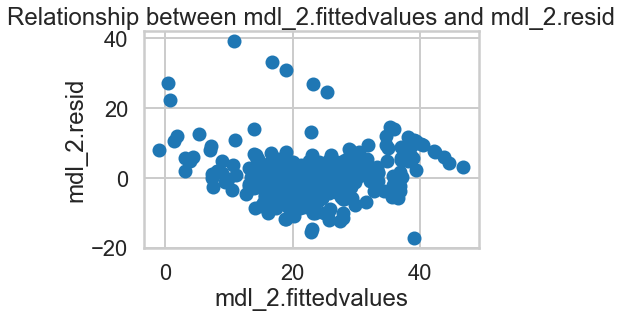

In [78]:
# scatter plot between mdl_2.fittedvalues and mdl_2.resid
plt.scatter(mdl_2.fittedvalues,mdl_2.resid)
plt.xlabel("mdl_2.fittedvalues")
plt.ylabel('mdl_2.resid')
plt.title("Relationship between mdl_2.fittedvalues and mdl_2.resid")

Normal distribution for errors assumption is violated. Residuals do not look like have a normal distribution. There are outliers.


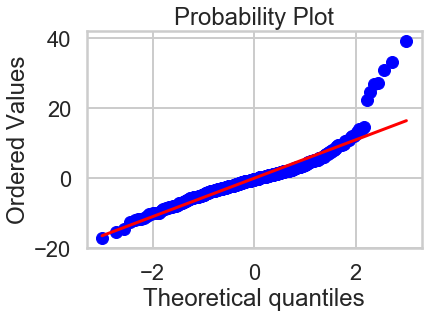

In [80]:
import pylab
stats.probplot(mdl_2.resid, dist="norm", plot=pylab)
pylab.show()

The plot does not appear to be a straight line, then the underlying distribution is not normal. The outliers are more visible now.

The fitted vs. residual plot:

If there exist any pattern (may be, a parabolic shape) in this plot, consider it as signs of non-linearity in the data. It means that the model doesn’t capture non-linear effects. If a funnel shape is evident in the plot, consider it as the signs of non constant variance i.e. heteroskedasticity.

The residual and quantile plot:

Using this plot we can infer if the data comes from a normal distribution and it is easier to detect outliers.

In [86]:
outliers= bos[mdl_2.resid >20]
outliers

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
368,4.89822,0.0,18.1,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
369,5.66998,0.0,18.1,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,50.0
370,6.53876,0.0,18.1,1.0,0.631,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
371,9.23230,0.0,18.1,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
372,8.26725,0.0,18.1,1.0,0.668,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0


Outliers affect the slope of the regression line. There are 7 outliers. 5 of them have the highest price, 50. However, I could not detect any other significant reason for outliers. 

In [88]:
import statsmodels.api as sm

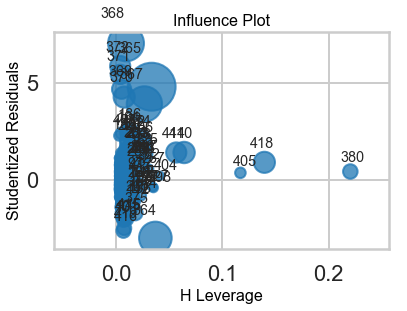

In [95]:
fig, ax = plt.subplots()
fig=sm.graphics.influence_plot(mdl_2,ax=ax)

405,418, and 380 have a leverage bigger than 0.1. They could be high influential points.

In [98]:
bos.iloc[[405, 418, 380], :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4


In [99]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [105]:
crime=bos[bos.CRIM >65]
crime

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8


The highest 3 crime is same with the high leverage points.

In [110]:
bost=bos.drop(bos.index[[380,405,418,365,367,368,369,370,371,372]])

In [111]:
mdl_4 = ols('PRICE ~ CRIM + RM + PTRATIO',bost).fit()
print(mdl_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     414.5
Date:                Sun, 01 Sep 2019   Prob (F-statistic):          3.19e-134
Time:                        23:58:49   Log-Likelihood:                -1468.9
No. Observations:                 496   AIC:                             2946.
Df Residuals:                     492   BIC:                             2963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0479      3.294     -1.836      0.0

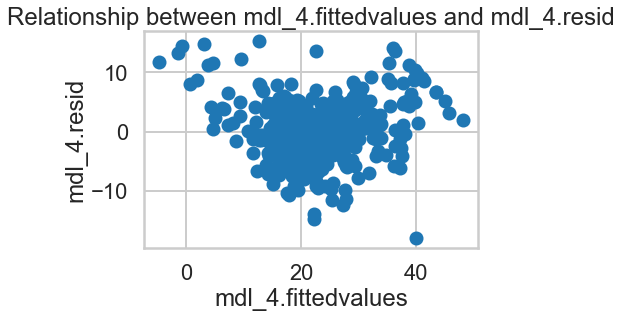

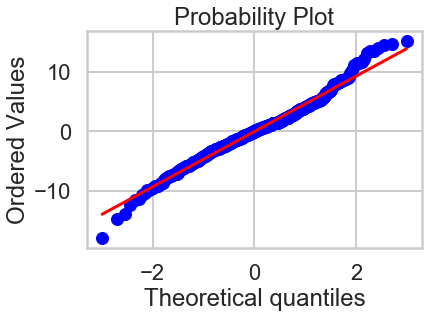

In [113]:
# scatter plot between mdl_4.fittedvalues and mdl_4.resid
plt.scatter(mdl_4.fittedvalues,mdl_4.resid)
plt.xlabel("mdl_4.fittedvalues")
plt.ylabel('mdl_4.resid')
plt.title("Relationship between mdl_4.fittedvalues and mdl_4.resid")
plt.show()
stats.probplot(mdl_4.resid, dist="norm", plot=pylab)
pylab.show()

After removing the outliers and high leverage points, model fit better. Adjusted R-squared now 0.715. This model is better than other three model. 